#  時系列データの例

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import STL

sns.set()
plt.rc("figure", figsize=(10, 8))
plt.rc("font", size=13)

## シミュレーションデータの例

,data
date,
2023-01-01,0.484005
2023-01-02,1.224587
2023-01-03,1.337571
2023-01-04,0.899302
2023-01-05,0.676021


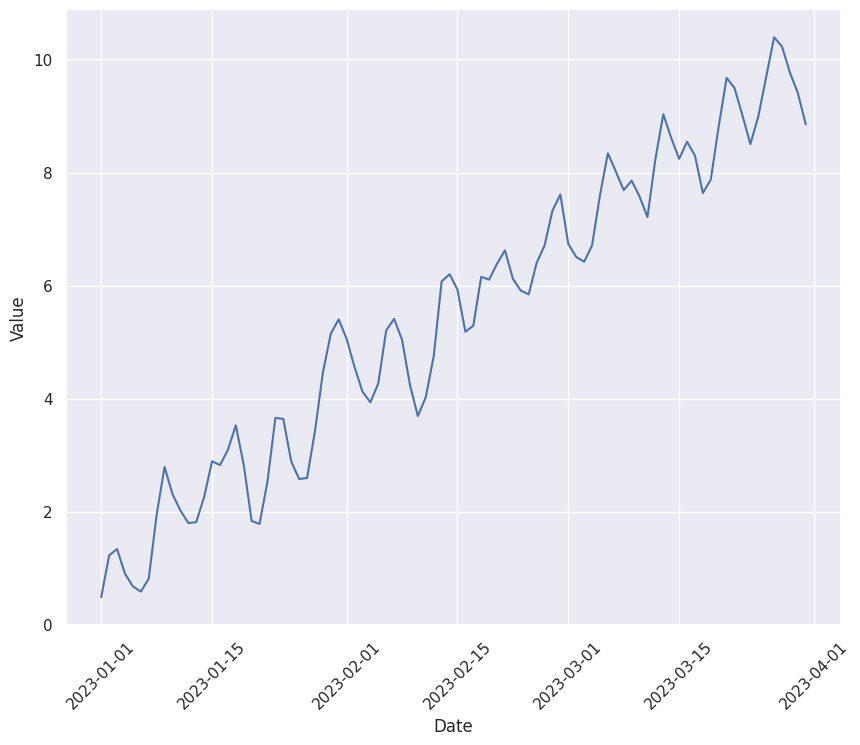

In [66]:
# データ長
n = 90

# ダミーの日付列を作成
dummy_dates = [datetime(2023, 1, 1) + timedelta(days=i) for i in range(n)]

# ダミーのトレンド系列を作成
dummy_trend = 0.1 * np.arange(1, n+1)

# ダミーの季節成分系列を7日周期で作成
dummy_seasonal = 0.6 * np.sin(np.arange(n) * 2 * np.pi / 7)

# ダミーの不規則項を生成
## 不規則項 I(t) = 0.8I(t-1) + ホワイトノイズ
_wn = np.random.rand(n)
dummy_resid = np.array([0.8*_wn[t-1] + _wn[t] if t>0 else _wn[0] for t in range(n)])

# ダミーデータを合成
dummy_data = dummy_trend + dummy_seasonal + dummy_resid

# ダミーデータをデータフレームにまとめる
dummy_df = pd.DataFrame({
    "date": dummy_dates,
    "data": dummy_data
})
# 日付列をindexに設定
dummy_df.set_index("date", inplace=True)

display(dummy_df.head())
sns.lineplot(x="date", y="data", data=dummy_df)
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)

plt.show()

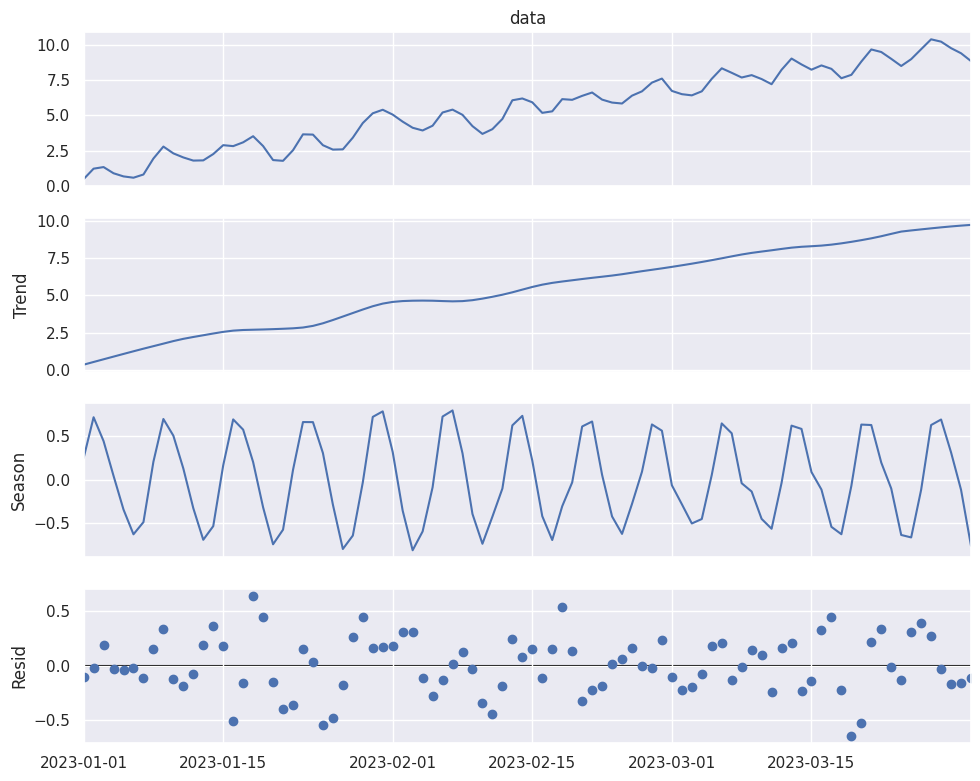

In [67]:
# STL分解
stl = STL(dummy_df["data"], seasonal=7)
decomp = stl.fit()
res = decomp.plot()

## 実データの例

1949~1960におけるアメリカの国際線航空旅客数のデータを利用する。

In [68]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


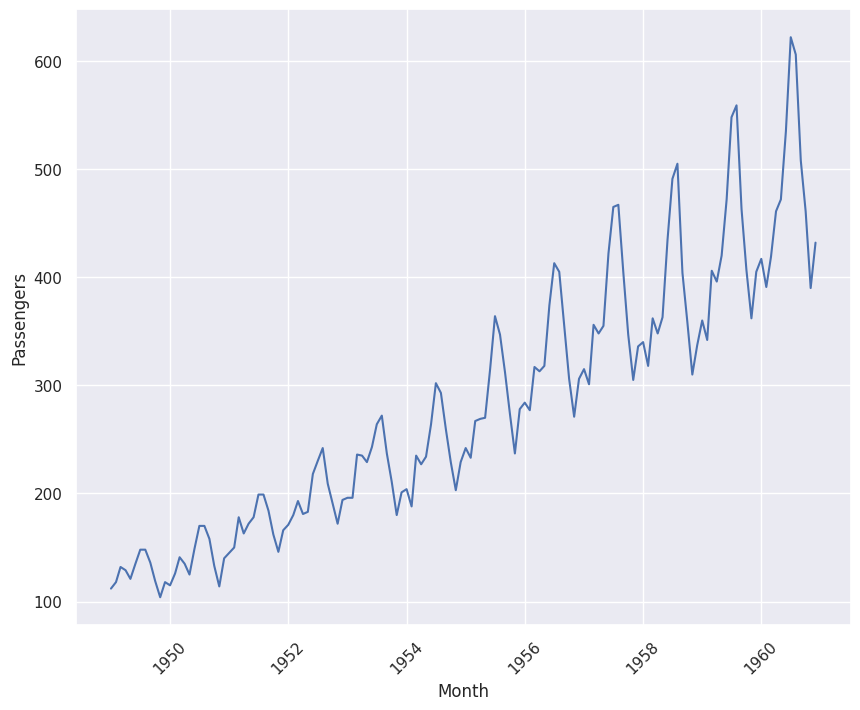

In [70]:
# プロット
sns.lineplot(x="Month", y="Passengers", data=df)
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.xticks(rotation=45)

plt.show()

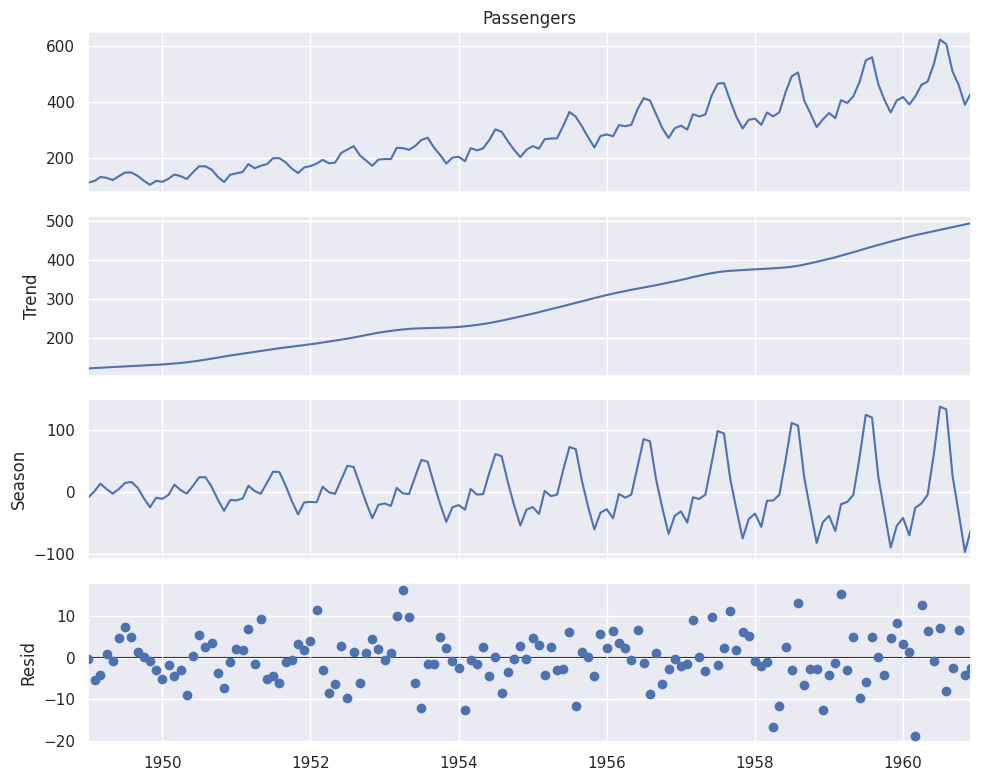

In [74]:
# STL分解
stl = STL(df["Passengers"], seasonal=13)
decomp = stl.fit()
res = decomp.plot()